## Part B - Predictive modelling

In [392]:
#import libraries:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [362]:
# Load the dataset:
data_path = "data/zomato_df_final_data.csv"
df = pd.read_csv(data_path)
df.head()

address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   
4              20 Campbell Street, Chinatown, Sydney   55.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   
3                        ['Modern Australian'] -33.856784   
4                            ['Thai', 'Salad'] -33.879035   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   
3  https://www.zomato.com/sydney/bennelong-restau...  151.215297   
4  https://www.zomato.com/sydney/chat-thai-chinatown  151.206409   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   
2  1800 700 700            4.9   Excellent   
3  02 9240 8000            4.9   Excellent   
4  02 8317 4811            4.5   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   
2                      The Star, Pyrmont                           Sokyo   
3                          Circular Quay            Bennelong Restaurant   
4                              Chinatown                       Chat Thai   

                     type   votes  groupon    color     cost_2 cuisine_color  
0       ['Casual Dining']  1311.0    False  #e15307   5.243902       #6f706b  
1                ['Café']  3236.0    False  #9c3203   7.560976       #6f706b  
2         ['Fine Dining']  1227.0    False  #7f2704  10.650407       #6f706b  
3  ['Fine Dining', 'Bar']   278.0    False  #7f2704  22.235772       #4186f4  
4       ['Casual Dining']  2150.0    False  #a83703   5.630081       #6f706b

### Exploratory data analysis (EDA)

In [363]:
# Display the shape of the dataset and column names
print("Data Shape:", df.shape)
print("Column Names:", df.columns)

# Display summary information about the dataset
print(df.info())

# Identify categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print("There are {} categorical variables\n".format(len(categorical)))
print("The categorical variables are: ", categorical)

# Display the first few rows of categorical variables
print(df[categorical].head())


Data Shape: (10500, 17)
Column Names: Index(['address', 'cost', 'cuisine', 'lat', 'link', 'lng', 'phone',
       'rating_number', 'rating_text', 'subzone', 'title', 'type', 'votes',
       'groupon', 'color', 'cost_2', 'cuisine_color'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type           10452 non-null  object 
 12  votes      

###### Explore categorical variables

In [364]:
# Explore categorical variables
df[categorical].head()

address  \
0                      371A Pitt Street, CBD, Sydney   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   
2   Level G, The Darling at the Star, 80 Pyrmont ...   
3   Sydney Opera House, Bennelong Point, Circular...   
4              20 Campbell Street, Chinatown, Sydney   

                                       cuisine  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké']   
2                                 ['Japanese']   
3                        ['Modern Australian']   
4                            ['Thai', 'Salad']   

                                                link         phone  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  02 8318 0406   
1  https://www.zomato.com/sydney/the-grounds-of-a...  02 9699 2225   
2        https://www.zomato.com/sydney/sokyo-pyrmont  1800 700 700   
3  https://www.zomato.com/sydney/bennelong-restau...  02 9240 8000   
4  https://www.zomato.com/sydney/chat-thai-chinatown  02 8317 4811   

  rating_text                                subzone  \
0   Very Good                                    CBD   
1   Excellent  The Grounds of Alexandria, Alexandria   
2   Excellent                      The Star, Pyrmont   
3   Excellent                          Circular Quay   
4   Excellent                              Chinatown   

                            title                    type    color  \
0                   Sydney Madang       ['Casual Dining']  #e15307   
1  The Grounds of Alexandria Cafe                ['Café']  #9c3203   
2                           Sokyo         ['Fine Dining']  #7f2704   
3            Bennelong Restaurant  ['Fine Dining', 'Bar']  #7f2704   
4                       Chat Thai       ['Casual Dining']  #a83703   

  cuisine_color  
0       #6f706b  
1       #6f706b  
2       #6f706b  
3       #4186f4  
4       #6f706b

###### Perform data cleaning to remove/impute any records that are useless in the predictive task (such as NA, NaN, etc.)

In [365]:
# Impute missing values in numerical and categorical columns
numerical_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='object').columns

df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# List of columns to remove during feature extraction
columns_to_remove = ['address', 'phone', 'link', 'title', 'color', 'cuisine_color']
df.drop(columns_to_remove, axis=1, inplace=True)


In [366]:
# Verify if there are any remaining missing values
df.isnull().sum()

cost             0
cuisine          0
lat              0
lng              0
rating_number    0
rating_text      0
subzone          0
type             0
votes            0
groupon          0
cost_2           0
dtype: int64

##### Feature Engineering

In [373]:
# Convert categorical columns to numeric using Label Encoding
categorical_cols_encoded = df.select_dtypes(include='object').columns
label_encoder = LabelEncoder()
df_encoded = df[categorical_cols_encoded].apply(lambda col: label_encoder.fit_transform(col))
df_encoded = pd.concat([df_encoded, df[numerical_cols]], axis=1)
# Assuming 'rating_number' is the target variable and other columns are predictors
Y = df_encoded['rating_number']  # Target variable
X = df_encoded.drop('rating_number', axis=1)  # Features


##### Regression

 Qn. Build a linear regression model (model_regression_1) to predict the restaurants rating (numeric rating) from other features (columns) in the dataset. Please consider splitting the data into train (80%) and test (20%) sets.[Hint: please use sklearn.model_selection.train_test_split and set random_state=0 “while splitting]

In [378]:
# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Scale the features using Min-Max Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scaled training features
X_test_scaled = scaler.fit_transform(X_test)    # Scaled testing features

# Create and train the linear regression model using scaled features
model_regression_minmax = LinearRegression()
model_regression_minmax.fit(X_train_scaled, y_train)  # Train the model using scaled training features

# Predict on the test set using the model with Min-Max scaling
y_pred_minmax = model_regression_minmax.predict(X_test_scaled)

# Evaluate the model with Min-Max scaling
mse_model_1 = mean_squared_error(y_test, y_pred_minmax)
r_squared_model_1 = r2_score(y_test, y_pred_minmax)

# Print evaluation metrics for the model with Min-Max scaling
print('Mean Squared Error (Min-Max Scaling):', mse_model_1)
print('R-squared (Min-Max Scaling):', r_squared_model_1)


Mean Squared Error (Min-Max Scaling): 0.06985793985739215
R-squared (Min-Max Scaling): 0.4615973556575489


Qn 4:Build another linear regression model (model_regression_2) with using the Gradient Descent as the optimisation function.

In [379]:
# Create and train the linear regression model using Gradient Descent
model_regression_gradient_descent = SGDRegressor(max_iter=1000, tol=1e-3, random_state=0)
model_regression_gradient_descent.fit(X_train_scaled, y_train)  # Train the model using scaled training features

# Predict on the test set using the model with Gradient Descent
y_pred_gradient_descent = model_regression_gradient_descent.predict(X_test_scaled)

# Evaluate the model with Gradient Descent
mse_gradient_descent_model_2 = mean_squared_error(y_test, y_pred_gradient_descent)
r_squared_gradient_descent_model_2= r2_score(y_test, y_pred_gradient_descent)

# Print evaluation metrics for the model with Gradient Descent
print('Mean Squared Error (Gradient Descent):', mse_gradient_descent_model_2)
print('R-squared (Gradient Descent):', r_squared_gradient_descent_model_2)


Mean Squared Error (Gradient Descent): 0.08188907270788
R-squared (Gradient Descent): 0.3688721227869356


###### Report the mean square error (MSE) on the test data for both models.

In [380]:
# Print MSE for both models
print('MSE for Linear Regression (model_regression_1):', mse_model_1)
print('MSE for Linear Regression with Gradient Descent (model_regression_2):', mse_gradient_descent_model_2)

MSE for Linear Regression (model_regression_1): 0.06985793985739215
MSE for Linear Regression with Gradient Descent (model_regression_2): 0.08188907270788


### III. Classification:

In [387]:
# Create a new DataFrame for classification features
X_classification = X_encoded.copy()

# Assign binary classes based on the rating_text
X_classification['class'] = df['rating_text'].apply(lambda x: 1 if x in ['Poor', 'Average'] else 2)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Create and train a logistic regression model
model_classification_3 = LogisticRegression()
model_classification_3.fit(X_train, y_train)

# Predict on the test set
y_pred = model_classification_3.predict(X_test)

# Evaluate the classification model using confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print('Classification Report:\n', report)

Classification Report:
               precision    recall  f1-score   support

           1       0.90      0.97      0.93      1631
           2       0.86      0.63      0.72       469

    accuracy                           0.89      2100
   macro avg       0.88      0.80      0.83      2100
weighted avg       0.89      0.89      0.89      2100



C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


##### Confusion Matrix

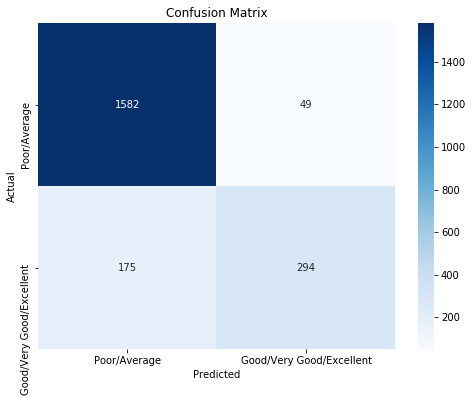

In [388]:
# Define class names
class_names = ['Poor/Average', 'Good/Very Good/Excellent']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##### Observations

Model performs well for Class 1 due to a larger number of instances.Class 2 predictions are satisfactory but could improve, especially recall.The data is imbalanced, affecting Class 2 predictions.

##### Bonus

Qn: Repeat the previous classification task using three other models of your choice (example suggestions here (on Scikit-Learn website) and report the performance.

In [389]:

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Evaluate models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Print the model name
    print(f"\nModel: {name}")
    
    # Print classification report
    print(classification_report(y_test, y_pred))


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Model: Logistic Regression
              precision    recall  f1-score   support

           1       0.90      0.97      0.93      1631
           2       0.86      0.63      0.72       469

    accuracy                           0.89      2100
   macro avg       0.88      0.80      0.83      2100
weighted avg       0.89      0.89      0.89      2100


Model: Random Forest
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1631
           2       1.00      1.00      1.00       469

    accuracy                           1.00      2100
   macro avg       1.00      1.00      1.00      2100
weighted avg       1.00      1.00      1.00      2100


Model: SVM
              precision    recall  f1-score   support

           1       0.78      1.00      0.88      1631
           2       1.00      0.02      0.03       469

    accuracy                           0.78      2100
   macro avg       0.89      0.51      0.45      2100
weighted avg

##### Insights based on 4 models